<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [44]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [52]:
Corte_diamante = data[["cut","price"]]. groupby(["cut",]).agg("mean").reset_index()
print(Corte_diamante)

         cut        price
0      Ideal  3457.541970
1    Premium  4584.257704
2  Very Good  3981.759891
3       Good  3928.864452
4       Fair  4358.757764


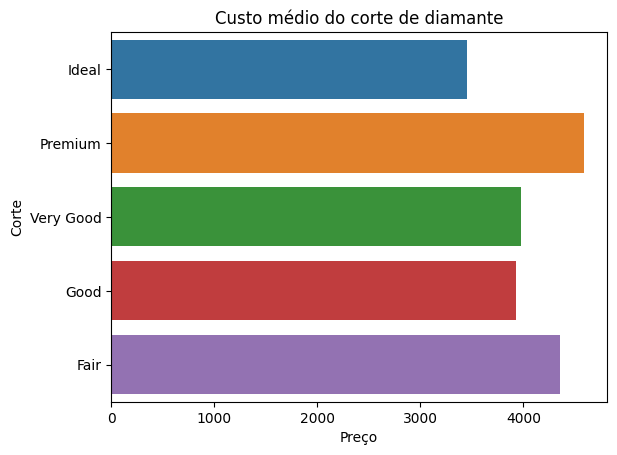

In [56]:
# gráfico do exercício 1

diamante = sns.barplot ( x = "price", y = "cut", data = Corte_diamante, orient = "h")

diamante.set(title="Custo médio do corte de diamante", xlabel="Preço",ylabel="Corte");

**Insight do gráfico 1**: Na média o corte de diamente com maior custo é o corte Premium

---

## 2\. Número de passageiros em dezembro por ano

In [57]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [75]:
data.dtypes

year             int64
month         category
passengers       int64
dtype: object

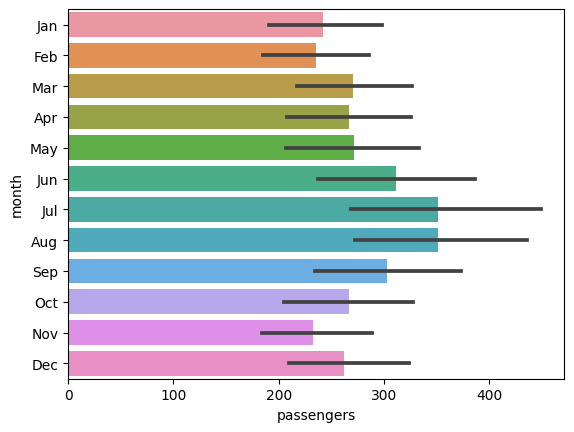

In [67]:
# gráfico do exercício 2

flights = sns.barplot ( x = "passengers", y = "month", data = data, orient = "h")

<Axes: xlabel='year', ylabel='passengers'>

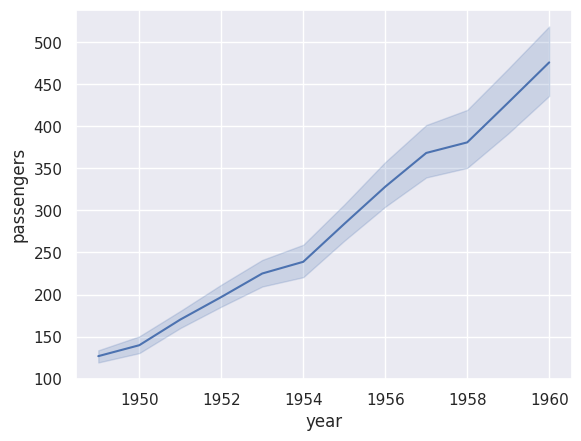

In [73]:
sns.set_theme(style="darkgrid")

sns.lineplot ( x = "year", y = "passengers", data = data)

**Insight do gráfico 2**: A tendencia é de a cada 4 anos dobrar a quantidade de passageiros enquanto que o mês mais movimentado é Julho e menos movimentado é novembro.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [ ]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

In [83]:
# gráfico do exercício 3
flights49_59= data.groupby("year")["passengers"].sum().sort_values(ascending=False)
flights49_59 = data[data['year'] <= 1959]
print(flights49_59)

     year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
127  1959   Aug         559
128  1959   Sep         463
129  1959   Oct         407
130  1959   Nov         362
131  1959   Dec         405

[132 rows x 3 columns]


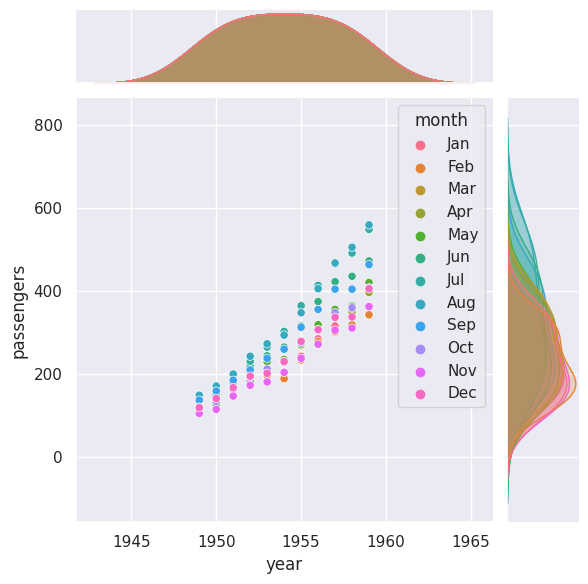

In [93]:
#sns.lineplot ( x = "month", y = "passengers", data = flights49_59)

sns.jointplot(data=flights49_59, x="year", y="passengers", hue="month")
sns.set_theme(style="whitegrid")

**Insight do gráfico 3**: Com isso podemos ver que mesmo com o passar dos anos os meses mantém certa constancia entre os que mais possuem passageiros e os que menos possuem passageiros

---